# [1] Create a gallery of the top 20 mechanisms.

In [1]:
%run "elegant_plot.ipynb" 
import re

Populating the interactive namespace from numpy and matplotlib


In [2]:
fig_save_path = r"C:\Users\singh\Dropbox\Nitin Singh\Thesis\Evolutionary Design\Figures\Section 9"

In [2]:
from Helper_Files.init_pop_hlpr2 import visualize
from Helper_Files.init_pop_hlpr1 import hlpr_fun

In [3]:
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

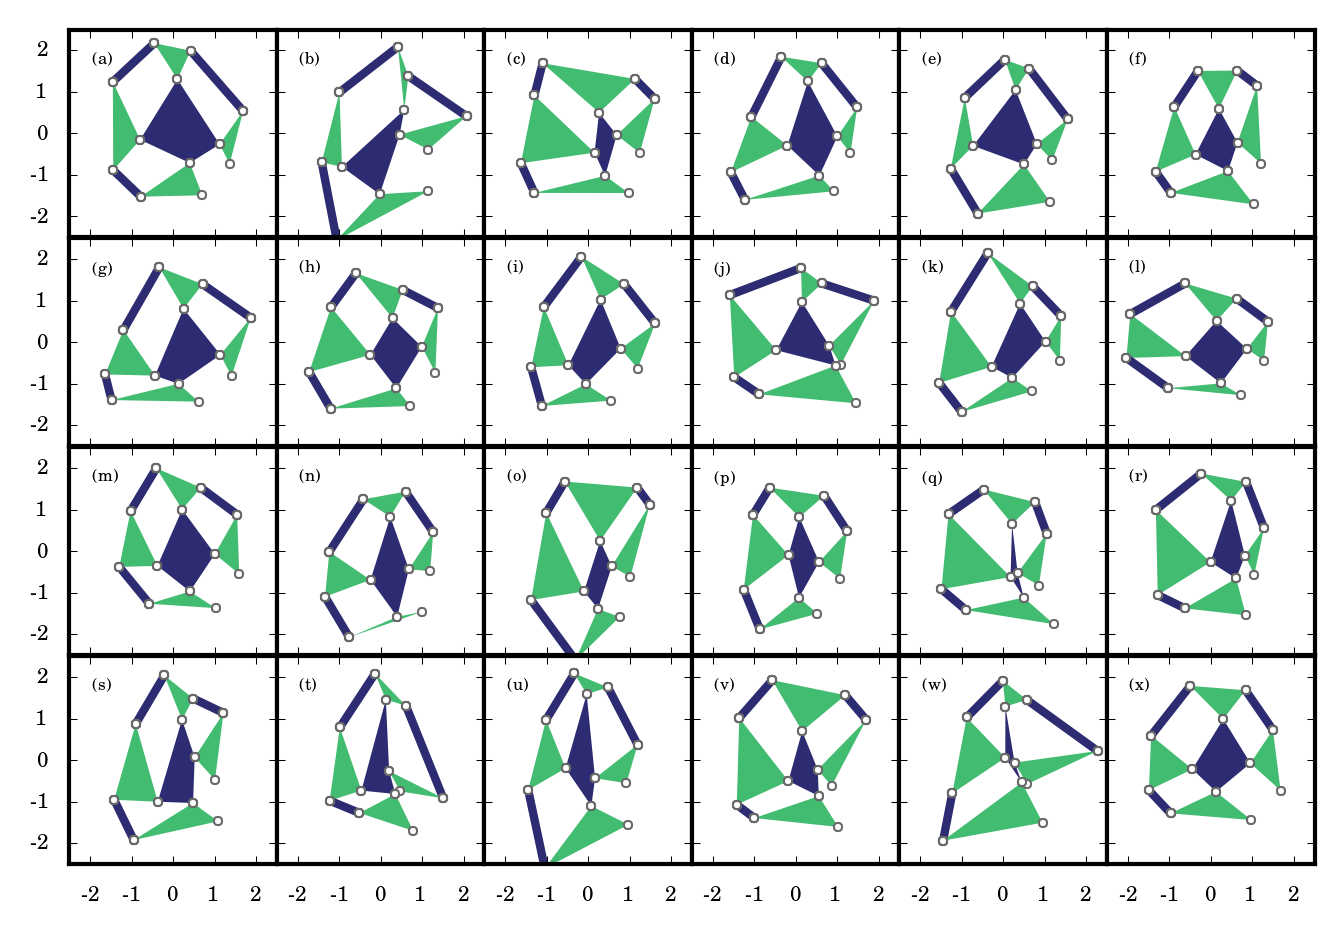

In [4]:
best_cost_grid = np.load(r"\\storage01\data\AMOLF\users\singh\Lisa PSO Runs\New - MSE Cost Function"\
                         r"\Horizontal Target Curve\Weight - 0.25\Data\best_cost_grid.npy")
best_cost_grid_copy = np.copy(best_cost_grid)

fig = fullfig(hf = 1.55)
plt.subplot(4,6,1)
plt.subplots_adjust(wspace=0, hspace=0)

fig_index = [chr(i) for i in range(ord('a'),ord('z')+1)]       # for later use

min_index_arr = np.zeros((24,3), dtype = int)

for count in range(24):
    i,j,k = np.where(best_cost_grid_copy == best_cost_grid_copy.min())
    best_cost_grid_copy[i , j, k] = 1000
    min_index_arr[count, 0] = i[0] 
    min_index_arr[count, 1] = j[0]
    min_index_arr[count, 2] = k[0]

row = -1; col = 0   
for count in range(24):
    col = count%4
    if(col == 0): 
        row += 1
        
    i_ = min_index_arr[count, 0]
    j_ = min_index_arr[count, 1]
    k_ = min_index_arr[count, 2]
    Tilings = np.zeros((100, 12, 2))
    
    data_dir = r"\\storage01\data\AMOLF\users\singh\Lisa PSO Runs"\
            r"\New - MSE Cost Function\Horizontal Target Curve\Weight - 0.25"

    str_ = "%02d"%(i_)
    file = data_dir + '\RunPso_c{0}_s{1}_r'.format("%02d"%(25*k_), "%02d"%(25*j_))+str_+'.out'
    fp = open(file)
    for j, line in enumerate(fp):

                if(j >= 1549 and (j-1549)%1534 >= 0 and (j-1549)%1534 <= 11):

                        test = re.split(r'\t+', line)
                        temp = int((j-1549)/1534)
                        if(temp == 0):
                            Tilings[temp, ((j-1549)%((temp+1)*1534)), 0] = float(test[0])
                            Tilings[temp, ((j-1549)%((temp+1)*1534)), 1] = float(test[1])

                        else:
                            Tilings[temp, ((j-1549)%((temp)*1534)), 0] = float(test[0])
                            Tilings[temp, ((j-1549)%((temp)*1534)), 1] = float(test[1])
    testTiling = Tilings[-1]/4
    pos_vec, ShapeInfo = hlpr_fun(testTiling)
    
    
    
    ax = plt.subplot(4,6,count + 1, aspect = 'equal')#; ax1.set_xlabel('x', labelpad = -1); ax1.set_ylabel('y', labelpad = -1)
    #ax.grid(True, lw = 0.15)
    #ax.set_axisbelow(True)
    ax.linewidth = 0.10
    if(count%6 != 0):# or count != 5 or count != 10 or count != 15):
        ax.set_yticklabels([])
    else:    
        ax.set_yticklabels([-2,-1,0,1,2], size = 5)
    if(count < 18):    
        ax.set_xticklabels([])
    else:    
        ax.set_xticklabels([-2,-1,0,1,2], size = 5)
    
    visualize(pos_vec, 3, ShapeInfo, '#2D2C72')
    ax.xaxis.set_tick_params(size = 2, width = 0.25,  pad=1)
    ax.yaxis.set_tick_params(size = 2, width = 0.25,  pad=1)
    plt.xlim((-2.5,2.5)); plt.ylim((-2.5,2.5))
    subplotlabel('(' + fig_index[count] +')', ax=ax, loc='upper left', size = 4)
    
    ax.tick_params(axis='both', which='major', pad=5)
    
    #text_ = float("%.2f" % float(re.split(r'e', str(best_cost_grid[i_,j_,k_]))[0]) + 
    #              'e' + re.split(r'e', str(best_cost_grid[i_,j_,k_]))[1])
    #str1 = "%.2f" % float(re.split(r'e', str(best_cost_grid[i_,j_,k_]))[0]) 
    #pow_ = int(re.split(r'e', str(best_cost_grid[i_,j_,k_]))[1])
    #ax.text(-1.75,-2, r"$\boldsymbol{f}$"+" "+"="+" "+"${0}$".format(str1)+"$\\times\;10^{0}$".format({pow_}), fontsize = 4)
    #ax.text(-1.75,-2, r"$\boldsymbol{f}$", fontsize = 4)
    #if((count + 1) % 4 == 0):
plt.savefig(r'C:\Users\singh\Dropbox\Nitin Singh\Thesis\Entire Thesis\Figures\Evolutionary Design\Section 9' 
            + r'\gallery_best_mechanisms.pdf', format='pdf',bbox_inches='tight')

In [6]:
min_index_arr

array([[ 6, 11,  2],
       [53, 10,  0],
       [10, 11,  0],
       [85,  8,  3],
       [42,  7,  5],
       [30,  9,  3],
       [97, 10,  0],
       [99, 10,  0],
       [65,  9,  1],
       [59,  8,  6],
       [41,  5,  7],
       [43, 10,  1],
       [49,  6,  6],
       [63, 10,  0],
       [57, 11,  0],
       [10,  7,  2],
       [84,  9,  1],
       [87,  7,  1],
       [19,  8,  1],
       [71, 10,  3],
       [60, 11,  0],
       [25, 10,  0],
       [42, 14,  0],
       [31,  5,  3]])

2
3


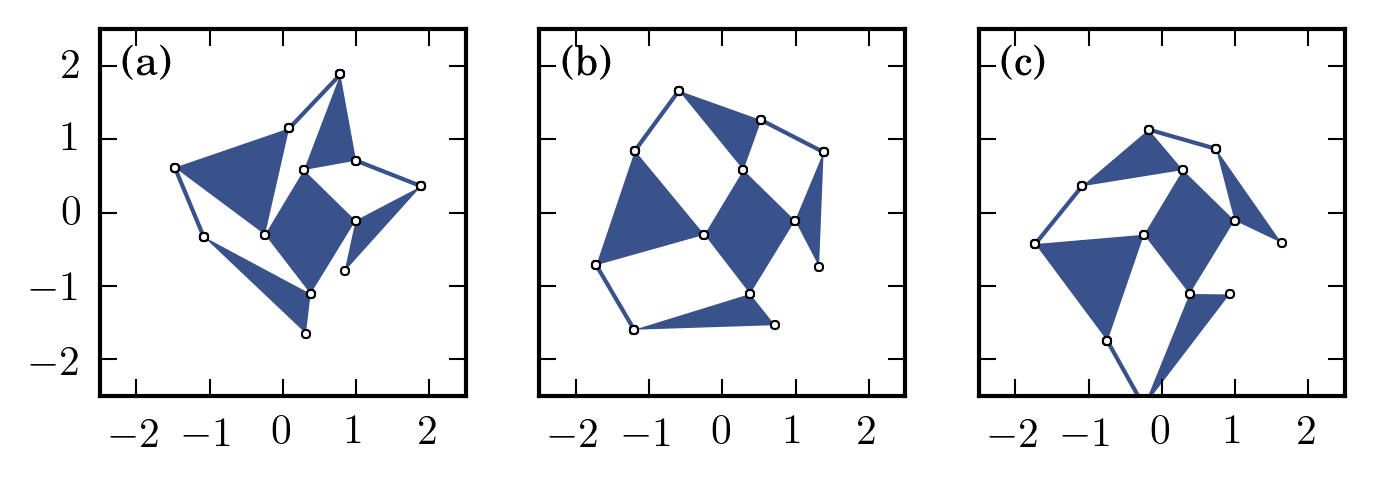

In [5]:
# For Martin
from Helper_Files.result_section_hlpr2 import hlpr_fun


fullfig(hf = 1.00)


data_dir = r"\\storage01\data\AMOLF\users\singh\Lisa PSO Runs"\
            r"\New - MSE Cost Function\Horizontal Target Curve\Weight - 0.25"

str_ = "%02d"%(99)
file = data_dir + '\RunPso_c{0}_s{1}_r'.format("%02d"%(25*0), "%02d"%(25*10))+str_+'.out'
fp = open(file)
Tilings = np.zeros((100, 12, 2))
for j, line in enumerate(fp):

            if(j >= 1549 and (j-1549)%1534 >= 0 and (j-1549)%1534 <= 11):

                    test = re.split(r'\t+', line)
                    temp = int((j-1549)/1534)
                    if(temp == 0):
                        Tilings[temp, ((j-1549)%((temp+1)*1534)), 0] = float(test[0])
                        Tilings[temp, ((j-1549)%((temp+1)*1534)), 1] = float(test[1])

                    else:
                        Tilings[temp, ((j-1549)%((temp)*1534)), 0] = float(test[0])
                        Tilings[temp, ((j-1549)%((temp)*1534)), 1] = float(test[1])
tiling = Tilings[-1]/4
fig_index = [chr(i) for i in range(ord('a'),ord('z')+1)] 


theta_ = [-np.pi/3, 0, np.pi/3]
#D_ = [3.99, 4.00, 3.99]
count_ = 1
for theta in theta_:
    
    ax = plt.subplot(1,3,count_, aspect = 'equal')
    hlpr_fun(tiling, theta)
    
    
    
    subplotlabel('(' + fig_index[count_-1] +')', ax=ax, loc='upper left', size = 10)

    
    #ax.text(1.5,-2, D_[count_ - 1], fontsize = 7)
    #ax.text(0.75,-2, 'D = ', fontsize = 7)
        
    if(count_ != 1):
        print(count_)
        ax.set_yticklabels([])
        
    count_+= 1

plt.savefig(fig_save_path + r'\deformed_examples.pdf', format='pdf',bbox_inches='tight')    

# [2] Additional Results
### Evolving Mechanism

0.24
0.07
2
0.02
3
4


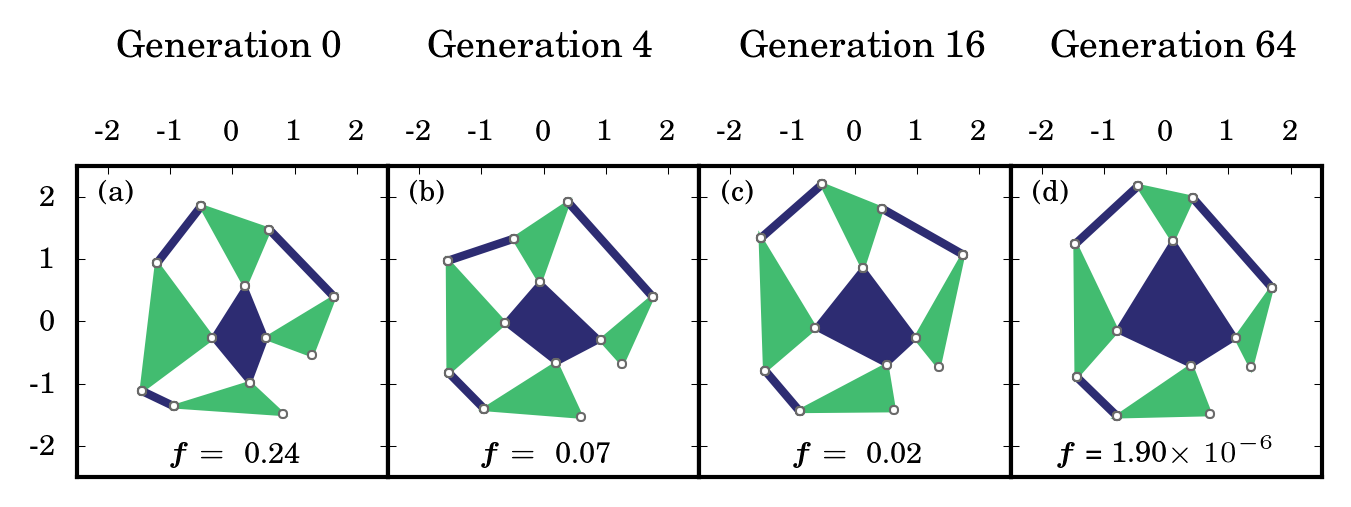

In [9]:
fullfig(hf = 1.00)
plt.subplots_adjust(wspace=0, hspace=0)


data_dir = r"\\storage01\data\AMOLF\users\singh\Lisa PSO Runs\New - MSE Cost Function" \
           r"\Horizontal Target Curve\Weight - 0.25\Movie\Data"
    
data_file = data_dir + r"\Tilings.npy"
data = np.load(data_file)

best_fitness = np.load(data_dir + r"\bestFitness.npy") 

generations = [0, 7, 16, 64]
count_= 1
fake_gen = [0, 4, 16, 64]
for gen in generations:
    tiling = data[gen] / 4
    
    pos_vec, ShapeInfo = hlpr_fun(tiling)
    ax = plt.subplot(1,4,count_, aspect = 'equal')
    ax.xaxis.set_tick_params(size = 2, width = 0.25,  pad=1)
    ax.yaxis.set_tick_params(size = 2, width = 0.25,  pad=1)
    
    #ax.grid(True, lw = 0.15)
    #ax.set_axisbelow(True)
    
    ax.set_xticklabels([-2,-1,0,1,2], size = 7)
    ax.set_yticklabels([-2,-1,0,1,2], size = 7)
    
    ax.xaxis.set_ticks_position('top')
    visualize(pos_vec, 3, ShapeInfo, '#2D2C72')
    
    ax.text(-1.85, 4.25,'Generation {0}'.format(fake_gen[count_ - 1]), size = 9)
    
    subplotlabel('(' + fig_index[count_-1] +')', ax=ax, loc='upper left', size = 7)

    if(gen == 64):
        str1 = "%.2f" % float(re.split(r'e', str(best_fitness[gen,0]))[0]) 
        pow_ = int(re.split(r'e', str(best_fitness[gen,0]))[1])
        
        text_ = float("%.2f" % float(re.split(r'e', str(best_fitness[gen,0]))[0]) + 
                  'e' + re.split(r'e', str(best_fitness[gen,0]))[1]) 
        #ax.text(0.5,-2, text_, fontsize = 7)
        #ax.text(-0.5,-2, '$f = $', fontsize = 7)
        ax.text(-1.75,-2.25, r"$\boldsymbol{f}$" + " "+"=" + " "+"{0}".format(str1)+"$\\times\;10^{0}$".format({pow_}), fontsize = 7)
        
        
    else:
        text_ = "%.2f" % best_fitness[gen,0]
        print(text_)
        ax.text(0.2,-2.25, text_, fontsize = 7)
        ax.text(-1,-2.25, r'$\boldsymbol{f} = $', fontsize = 7)
    
    if(count_ != 1):
        print(count_)
        ax.set_yticklabels([])
    ax.set_xticklabels([-2,-1,0,1,2], size = 7)
        
        
    
    ax.tick_params(axis='both', which='major', pad=5)
    
    count_+= 1

plt.savefig(r'C:\Users\singh\Dropbox\Nitin Singh\Thesis\Entire Thesis\Figures\Evolutionary Design\Section 9' 
            + r'\evolving_best_solution.pdf', format='pdf',bbox_inches='tight')
#plt.show()    

### Evolving D($\theta$) Curve

2
3
4


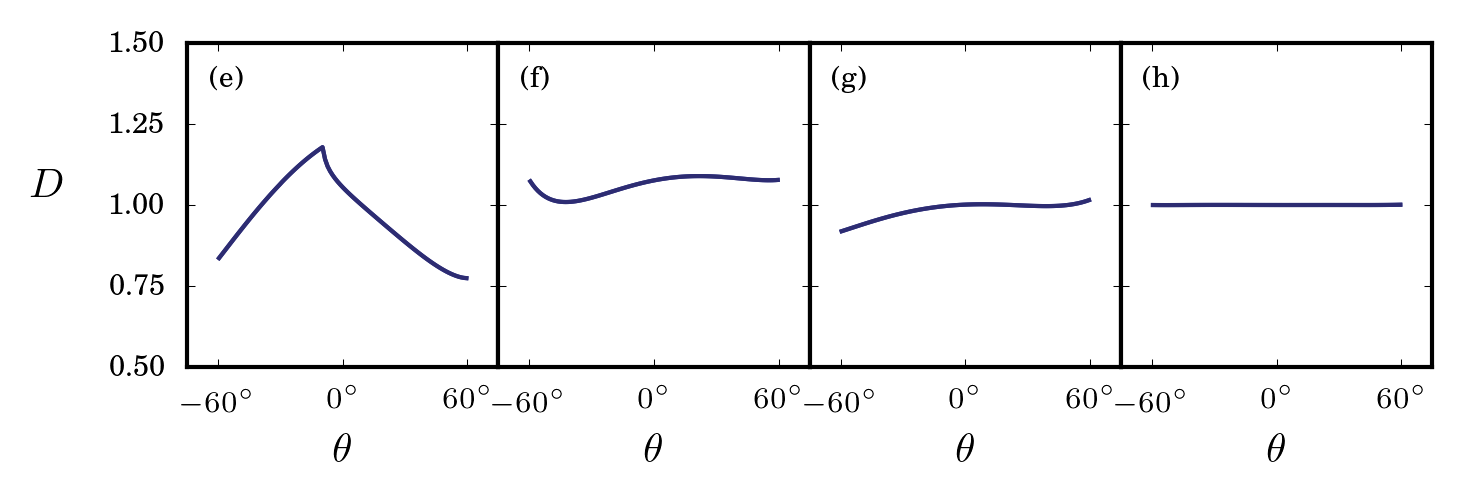

In [25]:
from Helper_Files.result_section_hlpr1 import hlpr_fun as hlpr_fun_dtheta 

fullfig(hf = 0.60)
plt.subplots_adjust(wspace=0, hspace=0)
fig_index = ['e', 'f', 'g', 'h'] 

data_dir = r"\\storage01\data\AMOLF\users\singh\Lisa PSO Runs\New - MSE Cost Function"\
            r"\Horizontal Target Curve\Weight - 0.25\Movie\Data"
    
data_file = data_dir + r"\Tilings.npy"
data = np.load(data_file)

best_fitness = np.load(data_dir + r"\bestFitness.npy") 

generations = [0, 7, 16, 64]
count_= 1
for gen in generations:
    tiling = data[gen] / 4
    
    
    ax = plt.subplot(1,4,count_)
    ax = plt.subplot(1,4,count_)
    ax.xaxis.set_tick_params(size = 2, width = 0.25,  pad=1)
    ax.yaxis.set_tick_params(size = 2, width = 0.25,  pad=1)
    
    
    #ax.set_yticklabels([-60,-30,0,30,60], size = 7)
    theta_, distance_ = hlpr_fun_dtheta(tiling)
    ax.plot(theta_*180/np.pi, distance_, color = '#2D2C72', linewidth = 1)
    
    subplotlabel('(' + fig_index[count_-1] +')', ax=ax, loc='upper left', size = 7)
    
    plt.ylim((0.5,1.5)); plt.xlim((-75,75))
    if(count_ == 1):
        plt.ylabel(r'$D$',fontname = "Helvetica", labelpad=15, rotation = 0)
    plt.xlabel(r'$\theta$', fontsize = 10, labelpad = 4)
    #plt.xticks([-60, 0, 60], fontsize = 10); plt.yticks([8.0, 6.0,  4.0, 2.0, 0.0], fontsize = 10)  
    plt.xticks([-60, 0, 60]); plt.yticks([0.50,  1.0, 1.50])
    ax.set_xticks([-60, 0, 60]); ax.set_xticklabels([r'$-60^{\circ}$', r'$0^{\circ}$', r'$60^{\circ}$'], size = 7)
    ax.set_yticks([0.50,0.75,1.0,1.25,1.50]); ax.set_yticklabels(['0.50','0.75','1.00','1.25','1.50'], size = 7)
    
    if(count_ != 1):
        print(count_)
        ax.set_yticklabels([])
        ax.yaxis.set_label([])
    #ax.set_ylim((0.50, 1.5)) 
    #ax.set_xlim((-80, 80))
    ax.tick_params(axis='both', which='major', pad=5)
    count_+= 1
    
   

plt.savefig(fig_save_path + r'\evolving_distance_curve.pdf', format='pdf',bbox_inches='tight')
plt.show()       

## The convergence curves for means and best fitness !

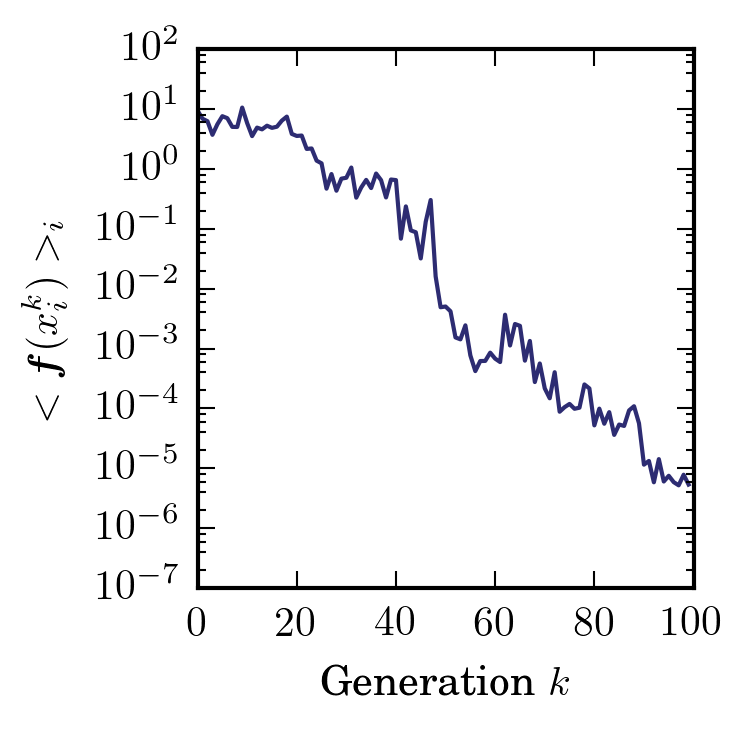

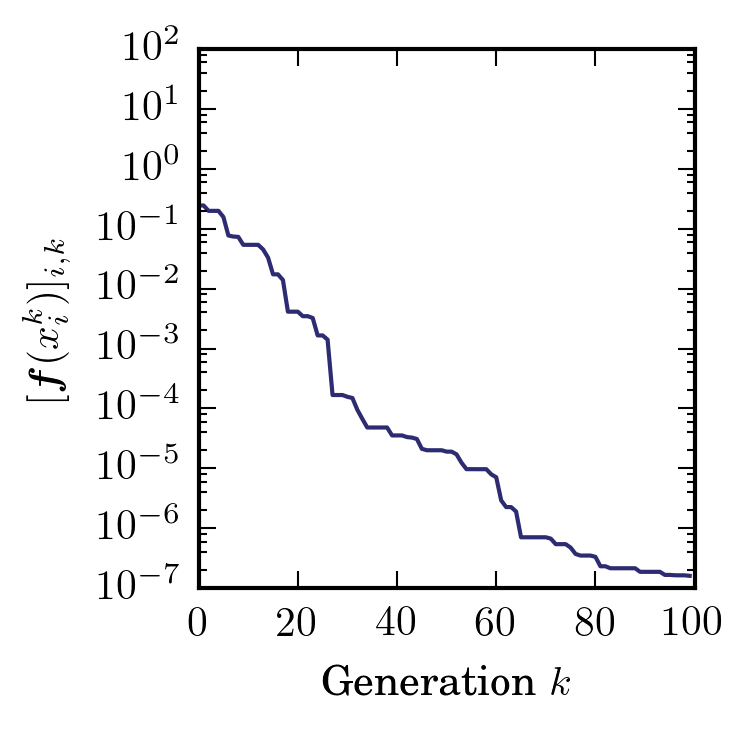

In [33]:
mean_fitness_withGen = np.load(r'\\storage01\data\AMOLF\users\singh\Lisa PSO Runs\New - MSE Cost Function'
                               r'\Horizontal Target Curve\Weight - 0.25\Movie\Data\meanFitness.npy')
best_fitness_withGen = np.load(r'\\storage01\data\AMOLF\users\singh\Lisa PSO Runs\New - MSE Cost Function'
                               r'\Horizontal Target Curve\Weight - 0.25\Movie\Data\bestFitness.npy')

halffig()
plt.semilogy(mean_fitness_withGen, color = '#2D2C72')
plt.xlabel('Generation $k$')
plt.ylabel(r'$<\boldsymbol{f}(x_i^k)>_{i}$')
plt.ylim([1e-7, 1e2])
plt.savefig(fig_save_path + r'\mean_fitness_withGen.pdf', format='pdf',bbox_inches='tight')

halffig()
plt.semilogy(best_fitness_withGen, color = '#2D2C72')
plt.xlabel('Generation $k$')
plt.ylabel(r'$[\boldsymbol{f}(x_i^k)]_{i,k}$')
plt.ylim([1e-7, 1e2])
plt.savefig(fig_save_path + r'\best_fitness_withGen.pdf', format='pdf',bbox_inches='tight')